In [1]:
import preprocessing
import geopandas as gpd
import pandas as pd
from shapely.geometry import shape 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_2016 = "mtl_trajet/mtl_trajet_2016.shp"
path_2017 = "mtl_trajet/trajets_mtl_trajet_2017.shp"

In [33]:
# ## FROM https://gis.stackexchange.com/questions/277231/geopandas-valueerror-a-linearring-must-have-at-least-3-coordinate-tuples
# ## Deal with raw data and load in trip final
# import json
# import fiona
# path_2016 = "../CASA Projects/msc_dissertation_notebooks/app_route_data/MTL_Trajet_2016_SHP/trip_final/trip_final.shp"
# #Read data
# collection = list(fiona.open(path_2016,'r'))
# df1 = pd.DataFrame(collection)

# #Check Geometry
# def isvalid(geom):
#     try:
#         shape(geom)
#         return 1
#     except:
#         return 0
# df1['isvalid'] = df1['geometry'].apply(lambda x: isvalid(x))
# df1 = df1[df1['isvalid'] == 1]
# collection = json.loads(df1.to_json(orient='records'))

# #Convert to geodataframe
# gdf = gpd.GeoDataFrame.from_features(collection)

## save the file
# gdf.to_file("mtl_trajet/mtl_trajet_2016.shp", encoding='utf-8')

In [4]:
gdf_2016 = preprocessing.dataPreProcessing.translate_data(path_2016).data

In [18]:
gdf_2017 = preprocessing.dataPreProcessing.translate_data(path_2017).data

In [5]:
print(len(gdf_2016.dropna(subset=['mode'])))
print(len(gdf_2016.dropna(subset=['purpose'])))

57879
57879


In [19]:
print(len(gdf_2017.dropna(subset=['mode'])))
print(len(gdf_2017.dropna(subset=['purpose'])))

74218
74218


In [20]:
set_2016_md = set(gdf_2016['mode'].unique())
set_2017_md = set(gdf_2017['mode'].unique())

In [21]:
set_2016_pur = set(gdf_2016['purpose'].unique())
set_2017_pur = set(gdf_2017['purpose'].unique())

In [22]:
mode_not_in_2016 = list(set_2017_md.difference(set_2016_md))
purpose_not_in_2016 = list(set_2017_pur.difference(set_2016_pur))
mode_not_in_2017 = list(set_2016_md.difference(set_2017_md))
purpose_not_in_2017 = list(set_2016_pur.difference(set_2017_pur))

In [23]:
len(gdf_2017.loc[(gdf_2017['mode'].apply(lambda row: row in mode_not_in_2016))])

11685

In [24]:
len(gdf_2017.loc[(gdf_2017['purpose'].apply(lambda row: row in purpose_not_in_2016))])

2836

In [25]:
purpose_not_in_2016

['pick_up_a_person', 'other', 'not_available']

In [31]:
gdf_2016

,id_trip,avg_speed,duration,mode,purpose,n_coord,segments,starttime,endtime,geometry
0,1724206,4.4,460,walking,returning_home,12,"[{""id"": 1150192, ""source"": ""geobase_mtl""}, {""i...",2016-09-07T20:37:26-04,2016-09-07T20:45:06-04,"LINESTRING (-73.5983784907 45.5364060323, -73...."
1,1724208,10.7,2146,other,work,120,"[{""id"": 1140016, ""source"": ""geobase_mtl""}, {""i...",2016-09-08T07:43:23-04,2016-09-08T08:19:09-04,"LINESTRING (-73.6057240345 45.5332354867, -73...."
2,1889461,15.4,447,public_transport,leisure,36,"[{""id"": 1390715, ""source"": ""geobase_mtl""}, {""i...",2016-09-08T19:46:14-04,2016-09-08T19:53:41-04,"LINESTRING (-73.55313767040001 45.5261139512, ..."
3,1724219,16.8,591,car,returning_home,45,"[{""id"": 1210250, ""source"": ""geobase_mtl""}, {""i...",2016-09-08T21:41:37-04,2016-09-08T21:51:28-04,"LINESTRING (-73.5739219686 45.5336004969, -73...."
4,2071985,6.9,279,other,drop_off_a_person,12,"[{""id"": 1140287, ""source"": ""geobase_mtl""}, {""i...",2016-09-09T16:49:12-04,2016-09-09T16:53:51-04,"LINESTRING (-73.5977874175 45.5317833425, -73...."
5,2071991,12.4,844,cycling,cafe,56,"[{""id"": 1150004, ""source"": ""geobase_mtl""}, {""i...",2016-09-09T18:22:22-04,2016-09-09T18:36:26-04,"LINESTRING (-73.60153864500001 45.537812044, -..."
6,1667922,4.2,1211,cycling,cafe,29,"[{""id"": 1240379, ""source"": ""geobase_mtl""}, {""i...",2016-09-09T23:41:59-04,2016-09-10T00:02:10-04,"LINESTRING (-73.6005503072 45.5240302697, -73...."
7,1667924,3.9,1330,walking,returning_home,29,"[{""id"": 1220168, ""source"": ""geobase_mtl""}, {""i...",2016-09-10T00:10:40-04,2016-09-10T00:32:50-04,"LINESTRING (-73.58342384469999 45.5233737253, ..."
8,2071994,9.8,930,cycling,returning_home,49,"[{""id"": 1120087, ""source"": ""geobase_mtl""}, {""i...",2016-09-09T20:04:18-04,2016-09-09T20:19:48-04,"LINESTRING (-73.6223175983 45.5362352172, -73...."
9,2072003,4.8,1266,walking,cafe,34,"[{""id"": 5640, ""source"": ""reseau_cyclable""}, {""...",2016-09-10T10:29:44-04,2016-09-10T10:50:50-04,"LINESTRING (-73.599938263 45.5347074582, -73.6..."


In [40]:
a = "hello"
'h' in a

True

In [46]:
import numpy as np

In [50]:
gdf_2016['mode'].value_counts()

car                 35511
public_transport    12706
walking              3956
cycling              3830
other                1876
Name: mode, dtype: int64

In [52]:
gdf_2017['purpose'].value_counts()

returning_home      27128
work                19241
leisure              9379
shops                8554
cafe                 3189
education            2830
pick_up_a_person     1592
other                1219
health               1061
not_available          25
Name: purpose, dtype: int64

In [49]:
len(np.where(gdf_2017.dropna()['mode'].apply(lambda row: ',' in row))[0])

10256

In [34]:
gdf_2017['mode'].value_counts()

car                                24744
cycling                            13595
public_transport                   12935
walking                            11062
walking, public_transport           6234
                                   ...  
car_sharing, other, taxi               1
other, taxi, cycling                   1
other, car, cycling                    1
car_sharing, other, car                1
taxi, public_transport, cycling        1
Name: mode, Length: 69, dtype: int64

In [54]:
gdf_2017['geometry'][0].xy

(array('d', [-73.651166, -73.651227, -73.653826, -73.654753, -73.654917, -73.654615, -73.65365, -73.653426, -73.653625, -73.65365, -73.654615, -73.654917, -73.654753, -73.654167, -73.651227, -73.651166, -73.651457, -73.651702, -73.651561, -73.651316, -73.651044, -73.651011, -73.651166, -73.651227, -73.654278, -73.654621, -73.654753]),
 array('d', [45.544501, 45.544519, 45.545258, 45.545521, 45.545565, 45.546086, 45.545816, 45.545753, 45.545809, 45.545816, 45.546086, 45.545565, 45.545521, 45.545354, 45.544519, 45.544501, 45.543993, 45.543567, 45.543526, 45.54394, 45.544401, 45.544456, 45.544501, 45.544519, 45.545386, 45.545483, 45.545521]))

In [26]:
gdf_2017[gdf_2017['purpose'].apply(lambda row: row in list(set_2017_pur.intersection(set_2016_pur)))]

,id_trip,mode,purpose,starttime,endtime,geometry
0,1547,None,None,2017-09-18 04:16:58UTC,2017-09-18 04:26:26UTC,"LINESTRING (-73.651166 45.544501, -73.65122700..."
1,308312,None,None,2017-09-18 06:17:46UTC,2017-09-18 06:58:49UTC,"LINESTRING (-73.650987 45.544496, -73.651011 4..."
2,384772,None,None,2017-09-18 09:30:24UTC,2017-09-18 10:17:28UTC,"(LINESTRING (-73.832869 45.636068, -73.831779 ..."
4,199011,None,None,2017-09-18 10:18:40UTC,2017-09-18 10:27:44UTC,"(LINESTRING (-73.74549500000001 45.55839, -73...."
5,421155,None,None,2017-09-18 10:42:13UTC,2017-09-18 10:45:16UTC,"LINESTRING (-73.45155699999999 45.747491, -73...."
6,29064,None,None,2017-09-18 10:47:52UTC,2017-09-18 10:49:34UTC,"(LINESTRING (-73.565325 45.51058, -73.565387 4..."
7,203781,None,None,2017-09-18 10:53:49UTC,2017-09-18 11:16:31UTC,"(LINESTRING (-73.65384400000001 45.550332, -73..."
8,273549,None,None,2017-09-18 10:54:50UTC,2017-09-18 11:08:43UTC,"LINESTRING (-73.445888 45.752319, -73.445544 4..."
9,314196,None,None,2017-09-18 10:57:01UTC,2017-09-18 11:23:51UTC,"LINESTRING (-73.668516 45.441993, -73.668194 4..."
10,224569,None,None,2017-09-18 11:02:21UTC,2017-09-18 11:10:07UTC,"LINESTRING (-73.61613199999999 45.543232, -73...."


Text(0.5, 1.0, 'MTL Trajet 2017')

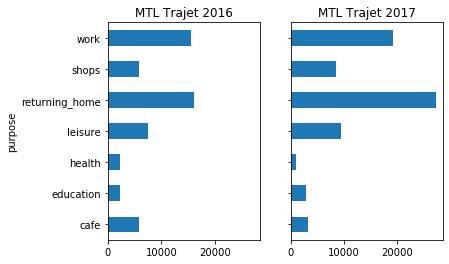

In [27]:
fig, (ax,ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
# plt.subplots_adjust(wspace=.7)
gdf_2016[gdf_2016['purpose'].apply(lambda row: row in list(set_2017_pur.intersection(set_2016_pur)))].groupby('purpose').agg({'purpose':'count'})['purpose'].plot(kind='barh', ax=ax)
gdf_2017[gdf_2017['purpose'].apply(lambda row: row in list(set_2017_pur.intersection(set_2016_pur)))].groupby('purpose').agg({'purpose':'count'}).plot(kind='barh', ax=ax2, legend=False)
ax.set_title("MTL Trajet 2016")
ax2.set_title("MTL Trajet 2017")

Text(0.5, 1.0, 'MTL Trajet 2017')

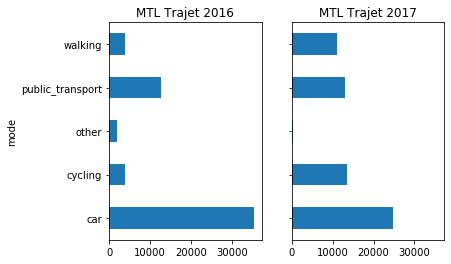

In [28]:
fig, (ax,ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
# plt.subplots_adjust(wspace=.7)
gdf_2016[gdf_2016['mode'].apply(lambda row: row in list(set_2017_md.intersection(set_2016_md)))].groupby('mode').agg({'purpose':'count'})['purpose'].plot(kind='barh', ax=ax)
gdf_2017[gdf_2017['mode'].apply(lambda row: row in list(set_2017_md.intersection(set_2016_md)))].groupby('mode').agg({'purpose':'count'}).plot(kind='barh', ax=ax2, legend=False)
ax.set_title("MTL Trajet 2016")
ax2.set_title("MTL Trajet 2017")